### softmax回归
- 模型输出可以是一个像图像类别这样的离散值；
- 对于离散值预测问题，可以使用诸如softmax回归在内的分类模型；
- 和线性回归不同，softmax回归的输出单元从一个变成了多个；
- 引入了softmax运算使输出更适合离散值的预测和训练；
- softmax回归跟线性回归一样，将输入特征与权重做线性叠加，但softmax回归的输出值个数等于标签里的类别数；
- ![](https://trickygo.github.io/Dive-into-DL-TensorFlow2.0/img/chapter03/3.4_softmaxreg.svg)
- softmax运算符（softmax operator）解决了两个问题:
  1. 由于输出层的输出值的范围不确定，难以直观上判断这些值的意义；
  2. 由于真实标签是离散值，这些离散值与不确定范围的输出值之间的误差难以衡量。
- softmax运算符将输出值变换成值为正且和为1的概率分布。
- 使用更适合衡量两个概率分布差异的测量函数，交叉熵（cross entropy）是一个常用的衡量方法：

In [1]:
import tensorflow as tf
import numpy as np
import time
import sys
import matplotlib.pyplot as plt

In [2]:
# （Fashion-MNIST）数据集获取：是一个10类服饰分类数据集
# (x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
# 或者
from tensorflow.keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [3]:
len(x_train),len(x_test)

(60000, 10000)

In [4]:
feature,label=x_train[1],y_train[1]

In [5]:
feature.shape, feature.dtype

((28, 28), dtype('uint8'))

In [6]:
label, type(label), label.dtype

(0, numpy.uint8, dtype('uint8'))

In [7]:
# 将数值标签转成相应的文本标签
def get_fashion_mnist_labels(labels):
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]
def show_fashion_mnist(images, labels):
    _, figs = plt.subplots(1, len(images), figsize=(12, 12))
    for f, img, lbl in zip(figs, images, labels):
        f.imshow(img.reshape((28, 28)))
        f.set_title(lbl)
        f.axes.get_xaxis().set_visible(False)
        f.axes.get_yaxis().set_visible(False)
    plt.show()


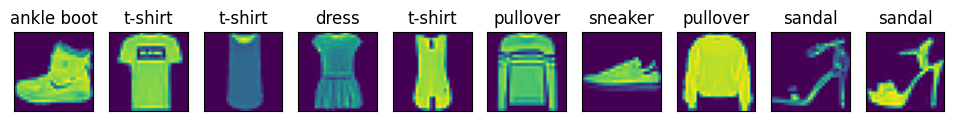

In [8]:
X, y = [], []
for i in range(10):
    X.append(x_train[i])
    y.append(y_train[i])
show_fashion_mnist(X, get_fashion_mnist_labels(y))


In [9]:
# 创建 tf.data.Dataset.from_tensor_slices 实例，
# 每次读取一个样本数为batch_size的小批量数据
# batch_size是一个超参数
batch_size = 256
if sys.platform.startswith('win'):
    num_workers = 0  # 0表示不用额外的进程来加速读取数据
else:
    num_workers = 4
train_iter = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(batch_size)

In [10]:
# 查看读取一遍训练数据所需时间
start = time.time()
for X, y in train_iter:
    continue
print('%.2f sec' % (time.time() - start))

0.14 sec
